In [2]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
from nltk.probability import FreqDist
import numpy as np
import itertools
import pylab

In [4]:
# Load the Pandas libraries with alias 'pd' 
# Read data from file 'filename.csv' 
# (in the same directory that your python process is based)
# Control delimiters, rows, column names with read_csv (see later) 
data = pd.read_csv(r"C:\Users\ty_ma\Downloads\yelp.csv\yelp.csv")
# Preview the first 5 lines of the loaded data 
data[:5]

FileNotFoundError: [Errno 2] File b'wikipedia_text_files.csv' does not exist: b'wikipedia_text_files.csv'

In [80]:
data.shape[0]

10000

In [9]:
data = data[['review_id','text']]

In [10]:
string = data.text
string[0]

'My wife took me here on my birthday for breakfast and it was excellent.  The weather was perfect which made sitting outside overlooking their grounds an absolute pleasure.  Our waitress was excellent and our food arrived quickly on the semi-busy Saturday morning.  It looked like the place fills up pretty quickly so the earlier you get here the better.\n\nDo yourself a favor and get their Bloody Mary.  It was phenomenal and simply the best I\'ve ever had.  I\'m pretty sure they only use ingredients from their garden and blend them fresh when you order it.  It was amazing.\n\nWhile EVERYTHING on the menu looks excellent, I had the white truffle scrambled eggs vegetable skillet and it was tasty and delicious.  It came with 2 pieces of their griddled bread with was amazing and it absolutely made the meal complete.  It was the best "toast" I\'ve ever had.\n\nAnyway, I can\'t wait to go back!'

In [11]:
data['SentenceTokens'] = data.text.apply(nltk.sent_tokenize)

In [12]:
data['WordTokens'] = data.text.apply(nltk.word_tokenize)

In [18]:
data = data[['WordTokens']]

In [19]:
data[:5]

,WordTokens
0,"[My, wife, took, me, here, on, my, birthday, f..."
1,"[I, have, no, idea, why, some, people, give, b..."
2,"[love, the, gyro, plate, ., Rice, is, so, good..."
3,"[Rosie, ,, Dakota, ,, and, I, LOVE, Chaparral,..."
4,"[General, Manager, Scott, Petello, is, a, good..."


In [20]:
data.columns

Index(['WordTokens'], dtype='object')

In [31]:
flatdata = data.values.flatten()
print(flatdata[1])

['I', 'have', 'no', 'idea', 'why', 'some', 'people', 'give', 'bad', 'reviews', 'about', 'this', 'place', '.', 'It', 'goes', 'to', 'show', 'you', ',', 'you', 'can', 'please', 'everyone', '.', 'They', 'are', 'probably', 'griping', 'about', 'something', 'that', 'their', 'own', 'fault', '...', 'there', 'are', 'many', 'people', 'like', 'that', '.', 'In', 'any', 'case', ',', 'my', 'friend', 'and', 'I', 'arrived', 'at', 'about', '5:50', 'PM', 'this', 'past', 'Sunday', '.', 'It', 'was', 'pretty', 'crowded', ',', 'more', 'than', 'I', 'thought', 'for', 'a', 'Sunday', 'evening', 'and', 'thought', 'we', 'would', 'have', 'to', 'wait', 'forever', 'to', 'get', 'a', 'seat', 'but', 'they', 'said', 'we', "'ll", 'be', 'seated', 'when', 'the', 'girl', 'comes', 'back', 'from', 'seating', 'someone', 'else', '.', 'We', 'were', 'seated', 'at', '5:52', 'and', 'the', 'waiter', 'came', 'and', 'got', 'our', 'drink', 'orders', '.', 'Everyone', 'was', 'very', 'pleasant', 'from', 'the', 'host', 'that', 'seated', 'us

In [29]:
fdist = FreqDist(flatdata[1])
print(fdist)

<FreqDist with 160 samples and 288 outcomes>


In [51]:
flatList = list(itertools.chain.from_iterable(flatdata))
freq = FreqDist(flatList)
print(freq)

<FreqDist with 43876 samples and 1519683 outcomes>


In [92]:
flatList[:5]

['My', 'wife', 'took', 'me', 'here']

In [106]:
import re
import itertools
from collections import Counter
bigrams = Counter(zip(flatList,flatList[1:]))


In [109]:
bigrams.most_common(15)

[(('.', 'I'), 13044),
 (('.', 'The'), 9630),
 ((',', 'and'), 6636),
 ((',', 'but'), 5519),
 (('of', 'the'), 4447),
 ((',', 'I'), 3967),
 (('in', 'the'), 3617),
 (('and', 'the'), 3517),
 (('.', 'It'), 3354),
 (('it', 'was'), 3059),
 (('on', 'the'), 2785),
 (('and', 'I'), 2769),
 (('.', 'We'), 2735),
 (('I', 'was'), 2730),
 ((',', 'the'), 2569)]

In [91]:
i = 0
words = set()
for word in flatList:
    if i>10000:
        break
    words.add(word)
    i += 1
    print (len(words))
    

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
17
18
19
20
21
22
23
24
25
26
27
28
28
29
30
30
30
30
31
32
33
34
34
35
36
37
38
38
39
40
41
41
42
43
44
45
45
46
46
47
48
49
49
49
50
50
51
52
53
54
54
54
54
55
56
56
56
56
57
57
58
58
59
60
61
62
63
63
63
64
64
65
66
67
68
69
70
70
71
71
72
73
74
75
75
76
76
76
76
76
77
77
78
79
79
79
80
81
81
82
82
82
82
83
84
85
86
87
88
88
88
88
89
89
90
90
90
91
92
93
94
95
95
96
97
97
97
97
97
97
98
98
98
99
100
100
100
100
100
100
101
102
103
103
103
103
103
103
104
104
104
105
106
107
108
109
110
111
111
112
113
114
115
116
117
118
119
120
121
122
122
122
122
123
123
124
124
124
124
125
126
127
127
128
129
130
131
131
132
133
133
134
135
136
137
137
138
138
138
138
138
139
140
141
141
141
142
142
142
142
143
143
144
145
145
146
147
147
147
147
147
148
148
149
150
150
151
151
151
151
152
152
152
153
154
154
154
154
155
155
155
155
156
157
157
158
158
159
160
161
161
161
162
163
163
163
164
165
166
166
167
168
168
168
169
169
169
170
170
170
171
171
172


871
871
871
871
871
871
871
871
872
872
872
873
873
873
873
873
873
873
873
874
874
874
875
876
876
876
876
876
876
876
877
877
877
877
877
877
877
878
879
879
879
879
879
879
880
881
882
882
882
883
883
884
884
884
884
884
885
885
885
886
886
886
886
887
887
887
887
887
888
889
889
889
889
889
889
889
890
890
890
890
890
890
891
891
891
891
892
892
892
892
892
892
892
892
892
892
892
892
892
892
892
893
893
893
893
893
893
893
894
894
895
895
895
895
895
895
895
895
895
895
895
895
895
895
895
896
896
896
897
898
898
898
899
899
900
900
900
900
901
901
901
901
902
902
903
903
903
903
904
904
904
904
904
904
904
904
904
904
904
904
905
905
906
906
907
907
908
909
909
909
909
909
910
910
910
910
911
911
911
911
911
911
911
911
911
911
911
911
911
911
911
912
912
912
912
912
912
912
912
913
913
913
914
914
914
914
915
915
916
916
916
916
917
918
918
919
919
920
920
920
920
920
920
920
920
920
920
921
921
921
922
922
923
924
924
924
924
924
924
925
925
926
927
927
927
927
927
927
927
927


1429
1429
1430
1430
1430
1431
1432
1432
1432
1432
1432
1432
1432
1432
1432
1432
1432
1432
1433
1433
1433
1434
1434
1434
1434
1434
1435
1436
1436
1437
1437
1437
1437
1437
1437
1438
1438
1439
1439
1440
1440
1441
1441
1441
1441
1441
1441
1441
1442
1443
1444
1444
1445
1445
1446
1447
1447
1448
1448
1448
1448
1449
1449
1449
1449
1449
1449
1449
1450
1450
1450
1450
1450
1450
1451
1451
1451
1451
1451
1451
1451
1452
1452
1452
1452
1453
1454
1454
1454
1455
1455
1456
1456
1457
1457
1458
1458
1459
1459
1460
1461
1461
1461
1461
1462
1463
1463
1464
1464
1464
1464
1464
1464
1465
1465
1465
1466
1466
1467
1467
1467
1467
1467
1468
1468
1468
1468
1468
1468
1468
1468
1469
1469
1469
1469
1470
1470
1471
1472
1473
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1474
1475
1476
1476
1476
1476
1476
1476
1476
1476
1476
1477
1477
1477
1478
1478
1478
1479
1479
1479
1479
1479
1479
1479
1479
1480
1480
1480
1481
1481
1481
1482
1483
1483
1483
1483
1483
1483
1483
1483
1483
1483
1484
1484
1485
1485


1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1991
1992
1993
1993
1993
1993
1993
1993
1993
1993
1994
1994
1994
1994
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1995
1996
1996
1997
1997
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1998
1999
2000
2000
2000
2000
2000
2001
2001
2001
2002
2002
2003
2003
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2004
2005
2005
2005
2005
2005
2005
2005
2006
2006
2006
2006
2006
2006
2006
2006
2006
2007
2008
2008
2008
2008
2008
2008
2009
2010
2010
2011
2011
2011
2012
2013
2013
2013
2013
2014
2014
2014
2015
2015
2015
2016
2017
2018
2018
2018
2018
2019
2019
2019
2019
2019
2019
2019
2020
2020
2020
2020
2020
2021
2021
2021
2021
2021
2021
2021
2022
2022
2023
2024
2024
2024
2025
2025
2025
2025
2025
2026
2026
2026
2026
2026
2026
2027
2027
2027
2027
2027
2027
2028
2028
2029
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030
2030


In [86]:
print(len(flatList))

1519683


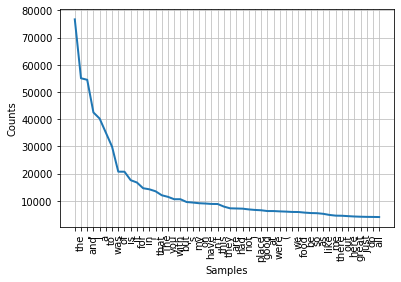

In [56]:
freq.plot(50,cumulative=False)
plt.show()

In [78]:
print(freq.pprint())

FreqDist({'.': 76733, 'the': 55086, ',': 54520, 'and': 42517, 'I': 40258, 'a': 35099, 'to': 29929, 'was': 20749, 'of': 20728, 'is': 17620, ...})
None


ValueError: x and y must have same first dimension, but have shapes (43876,) and (1,)

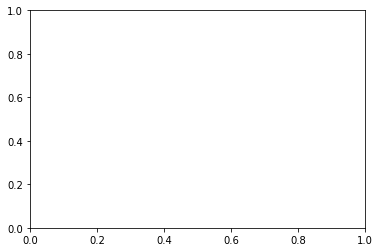

In [65]:
pylab.plot(range(1, freq.B() + 1), freq.values())
            
    # http://stackoverflow.com/questions/773814/plot-logarithmic-axes-with-matplotlib-in-python
    # just do a visual inspection and be done with it
    # not exactly doing a linear regression analysis here      
pylab.xscale('log')
pylab.yscale('log')
pylab.show()